In [ ]:
import os
import glob
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Data-20240107T131020Z-001/Data


/content/drive/MyDrive/Data-20240107T131020Z-001/Data


In [ ]:
train_folder = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/train'

In [ ]:
images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' + folder):
    images.append(os.path.join(train_folder, folder,image))

In [ ]:
fig = plt.figure(1, figsize = (15,9))

<Figure size 1500x900 with 0 Axes>

<ipython-input-7-a6fb74dd3557>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,n)


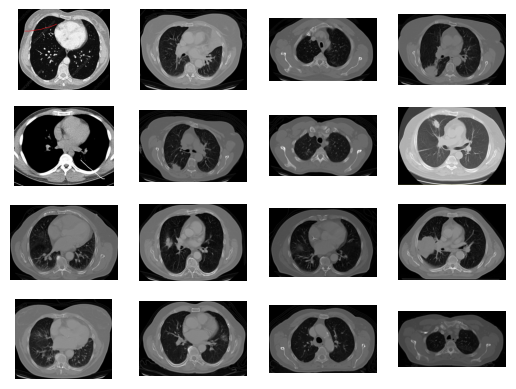

In [ ]:
fig.suptitle('Data overview', fontsize = 25)
plt.axis('off')
n = 0
for i in range(16):
  n +=1
  random_img = random.choice(images)
  imgs = tf.keras.utils.load_img(random_img)
  plt.subplot(4,4,n)
  plt.axis('off')
  plt.imshow(imgs)
plt.show()


In [ ]:
class_dirs = os.listdir("/content/drive/MyDrive/Data-20240107T131020Z-001/Data/train")

In [ ]:
image_dict ={}
count_dict= {}


In [ ]:
for cls in class_dirs:
  file_paths = glob.glob(f'/content/drive/MyDrive/Data-20240107T131020Z-001/Data/train/{cls}/*')
  count_dict[cls] = len(file_paths)
  image_path = random.choice(file_paths)
  image_dict[cls] = tf.keras.utils.load_img(image_path)

In [ ]:
class_dirs_test = os.listdir("/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test")

In [ ]:
image_dict_test ={}

In [ ]:
count_dict_test= {}

In [ ]:
for cls in class_dirs_test:
  file_paths_test = glob.glob(f"/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test/{cls}/*")
  count_dict_test[cls] = len(file_paths_test)
  image_path = random.choice(file_paths_test)
  image_dict_test[cls]= tf.keras.utils.load_img(image_path)

In [ ]:
plt.figure(figsize = (15,7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

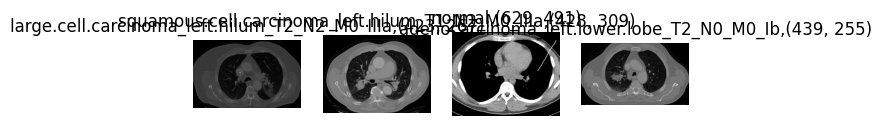

In [ ]:
for i ,(cls,img) in enumerate(image_dict.items()):
  ax = plt.subplot(1,4,i+1)
  plt.imshow(img)
  plt.title(f"{cls},{img.size}")
  plt.axis("off")

count of training samples per class:
                                               class  count
0     large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa    125
1  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa    155
2                                            normal    148
3        adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib    195 



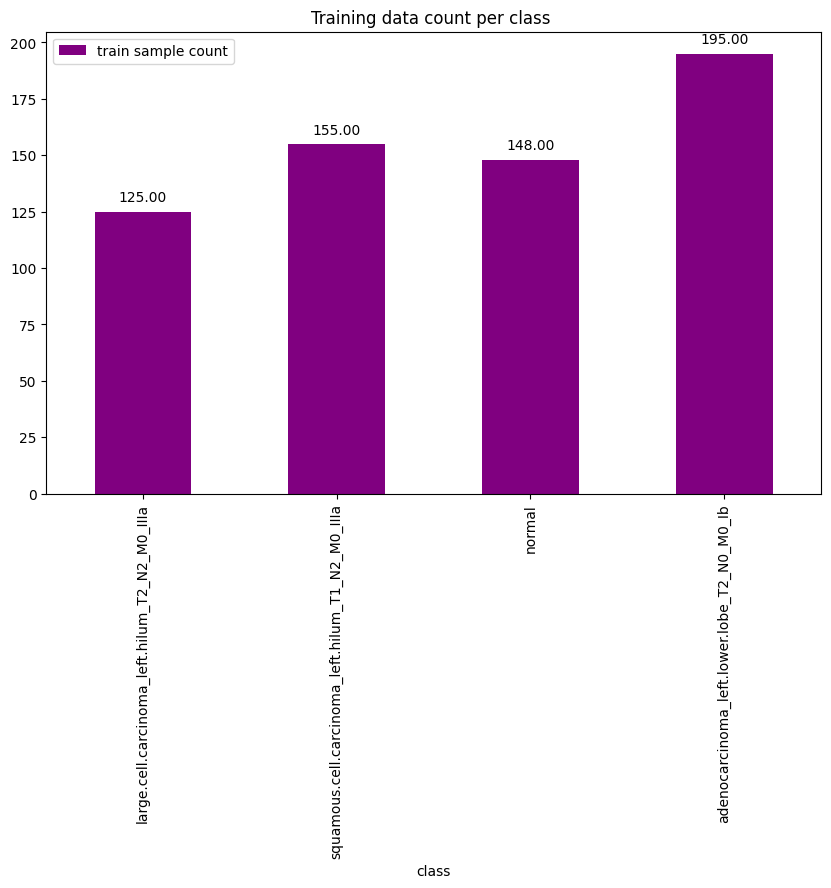

In [ ]:
df_count_train = pd.DataFrame({
      "class":count_dict.keys(),
      "count":count_dict.values(),
})
print("count of training samples per class:\n",df_count_train,"\n")

b = df_count_train.plot.bar(x='class', y='count',title = "Training data count per class ",label = 'train sample count',color ='purple',figsize=(10,6))
for q in b.patches:
  b.annotate(f'{q.get_height():0.2f}',(q.get_x()+q.get_width()/2.,q.get_height()),ha = 'center',va = 'center',xytext = (0,10),textcoords = 'offset points')
plt.show()

count of testing samples per class:
                                               class  count
0     large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa    125
1  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa    155
2                                            normal    148
3        adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib    195 



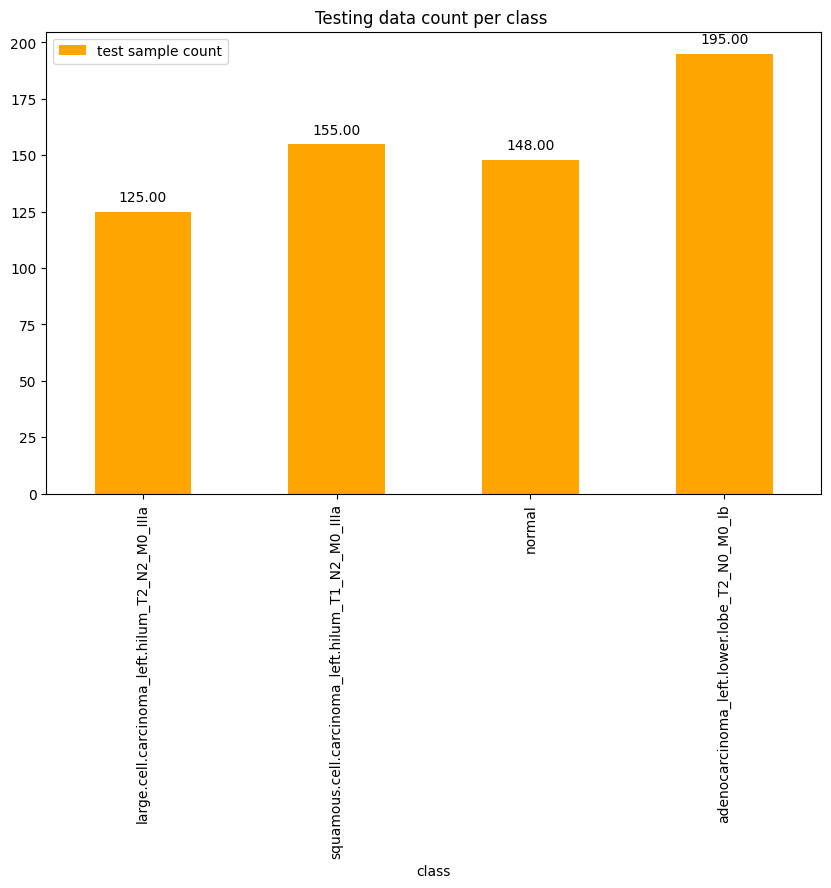

In [ ]:
df_count_test = pd.DataFrame({
      "class":count_dict_test.keys(),
      "count":count_dict_test.values(),
})
print("count of testing samples per class:\n",df_count_train,"\n")

a = df_count_train.plot.bar(x='class', y='count',title = "Testing data count per class ",label = 'test sample count',color ='orange',figsize=(10,6))
for p in a.patches:
  a.annotate(f'{p.get_height():0.2f}',(p.get_x()+q.get_width()/2.,p.get_height()),ha = 'center',va = 'center',xytext = (0,10),textcoords = 'offset points')
plt.show()

In [ ]:
train_dir = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/train'

In [ ]:
test_dir = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test'

In [ ]:
validation_dir ='/content/drive/MyDrive/Data-20240107T131020Z-001/Data/valid'

In [ ]:
image_size = (256,256)

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    batch_size=16,
    image_size=image_size,
    seed=2022,
    validation_split=None,  # Remove the validation_split argument
    shuffle=True
)

Found 623 files belonging to 4 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode='categorical',
    batch_size=16,
    image_size=image_size,
    seed=2022,
)

Found 315 files belonging to 4 classes.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    label_mode='categorical',
    batch_size=16,
    image_size=image_size,
    seed=2022,
    shuffle=False  # No need to shuffle the validation data
)

Found 72 files belonging to 4 classes.


In [ ]:
class_names = ['squamous.cell.carcinoma' , 'normal','large.cell.carcinoma','adenocarcinoma']

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255),
tf.keras.layers.InputLayer(input_shape = [image_size[0],image_size[1],3]),

tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),padding = 'Same',activation = 'relu'),

tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dense(4, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [ ]:
log_dir_1 = "logs/Custom_CNN_overfit"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_1,histogram_freq=1)

In [ ]:
history = model.fit(train_ds,epochs = 90, validation_data = valid_ds,callbacks=[tensorboard_cb])

Epoch 1/90
39/39 [==============================] - 12s 155ms/step - loss: 1.3732 - accuracy: 0.2408 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3984 - val_accuracy: 0.1806 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/90
39/39 [==============================] - 5s 107ms/step - loss: 1.3421 - accuracy: 0.2376 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4218 - val_accuracy: 0.1806 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/90
39/39 [==============================] - 5s 107ms/step - loss: 1.3242 - accuracy: 0.2697 - precision: 0.7895 - recall: 0.0241 - val_loss: 1.3570 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/90
39/39 [==============================] - 7s 154ms/step - loss: 1.2666 - accuracy: 0.3596 - precision: 0.8857 - recall: 0.0995 - val_loss: 1.2650 - val_accuracy: 0.4583 - val_precision: 1.0000 - val_recall: 0.0556
Epoch 5/90
39/39 [==============================] - 5s 113ms/st

KeyboardInterrupt: 

In [ ]:
def plot_acc_loss(model_history, n_epochs):

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
  ax = axes.ravel()

  ax[0].plot(range(0, n_epochs),[acc * 100 for acc in model_history.history['accuracy']],label = 'Train',color ='b')
  ax[0].plot(range(0, n_epochs),[acc * 100 for acc in model_history.history['val_accuracy']],label = 'val',color ='r')
  ax[0].set_title('Accuracy vs. epoch',fontsize = 15)
  ax[0].set_ylabel('Accuracy',fontsize = 15)
  ax[0].set_xlabel('epoch',fontsize = 15)
  ax[0].legend()

  ax[0].plot(range(0, n_epochs),[model_history.history['loss']],label = 'Train',color ='b')
  ax[0].plot(range(0, n_epochs),[model_history.history['val_loss']],label = 'val',color ='r')
  ax[0].set_title('Loss vs. epoch',fontsize = 15)
  ax[0].set_ylabel('Loss',fontsize = 15)
  ax[0].set_xlabel('epoch',fontsize = 15)
  ax[0].legend()

  plt.show()



ValueError: x and y must have same first dimension, but have shapes (90,) and (1, 90)

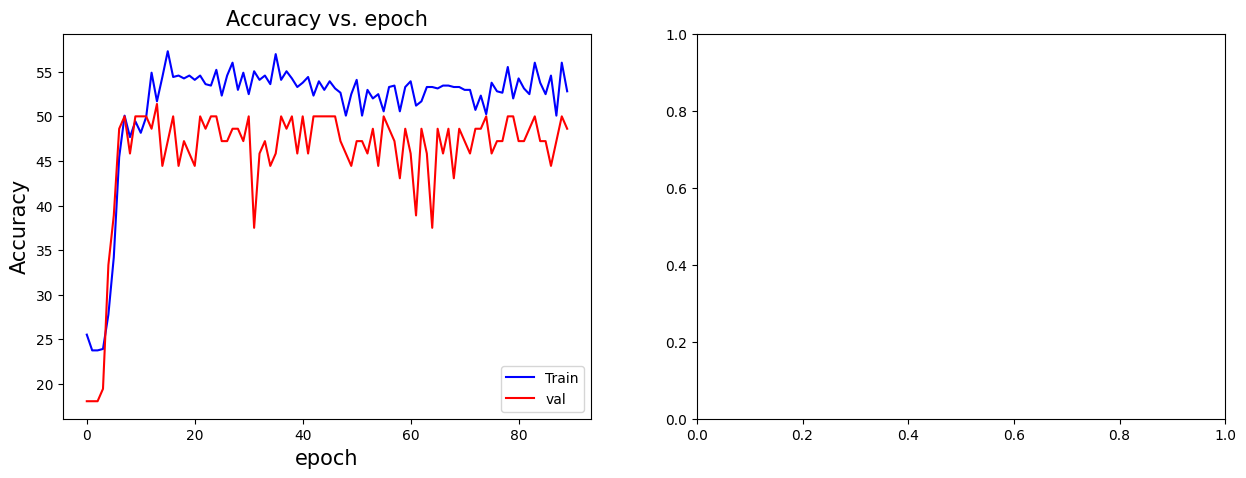

In [ ]:
plot_acc_loss(history, n_epochs=90)

In [ ]:
model.summary()

In [ ]:
test_images = []

for folder in os.listdir(test_dir):
  for image in os.listdir(test_dir + '/' + folder):
    test_images.append(os.path.join(test_dir, folder,image))

In [ ]:
def grid_test_model(model_name):

  fig = plt.figure(1,figsize=(17,11))
  plt.axis('off')
  n = 0
  for i in range(8):
    n+=1

    img_0 = tf.keras.utils.load_img(random.choice(test_images))
    img_0 = tf.keras.utils.load_img(random.choice(test_images))
    img_0 = tf.image.resize(img_0, (256,256))
    img_1 = tf.expand_dims(img_0,axis = 0)

    pred = model_name.predict(img_1)
    predicted_label = tf.argmax(pred, 1).numpy().item()

    for item in pred:
      item = tf.round((item*100))

    plt.subplot(2,4,n)
    plt.axis('off')
    plt.title(f'prediction : {class_names[predicted_label]}\n\n'
              f'{item[0]} % {class_names[0]}\n'
              f'{item[1]} % {class_names[1]}\n'
              f'{item[2]} % {class_names[2]}\n'
              f'{item[3]} % {class_names[3]}\n')
    plt.imshow(img_0/255)
  plt.show()

In [ ]:
grid_test_model(model)

In [ ]:
squamous_cell_carcinoma_path = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test/squamous.cell.carcinoma'
normal_path = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test/normal'
large_cell_carcinoma_path = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test/large.cell.carcinoma'
adenocarcinoma_path = '/content/drive/MyDrive/Data-20240107T131020Z-001/Data/test/adenocarcinoma'


In [ ]:
def classwise_accuracy(class_path, class_name, model_name):
  paths = []
  for i in os.listdir(class_path):
    paths.append(class_path + '/' + str(i))

  correct = 0
  total = 0

  for i in range(len(paths)):
    total+=1

    img = tf.keras.utils.load_img(paths[i])
    img = tf.keras.utils.img_to_array(img)
    img = tf.image.resize(img, (256,256))
    img = tf.expand_dims(img,axis = 0)

    pred = model_name.predict(img)
    if tf.argmax(pred[0]) == class_names.index(f"{class_name}"):
      correct+= 1

  print(f"Accuracy for class {class_name} is {round((correct/total)*100, 2)} % consisting of {len(paths)} images")



In [ ]:
classwise_accuracy(squamous_cell_carcinoma_path, 'squamous_cell_carcinoma', model)
classwise_accuracy(normal_path, 'normal', model)
classwise_accuracy(large_cell_carcinoma_path, 'large_cell_carcinoma', model)
classwise_accuracy(adenocarcinoma_path, 'adenocarcinoma', model)


In [ ]:
squamous_cell_carcinoma ,normal, large_cell_carcinoma, adenocarcinoma = 0,0,0,0

l1 = []
l2 = []
l3 = []
l4 = []


In [ ]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.2)

In [ ]:
def conf_mat(class_path, pred_list' mdel_name):
  squamous_cell_carcinoma ,normal, large_cell_carcinoma, adenocarcinoma = 0,0,0,0
  for i in os.listdir(class_path):

    img = tf.keras.utils.load_img(class_path + "/" + str(i))
    img = tf.keras.utils.img_to_array(img)
    img = tf.image.resize(img, (256,256))
    img = tf.expand_dims(img,axis = 0)

    pred = model_name.predict(img)
    predicted = tf.argmax(pred, 1).numpy().item()

    if predicted == 0:
      squamous_cell_carcinoma+= 1
    elif predicted == 1:
      normal+= 1
    elif predicted ==2:
      large_cell_carcinoma+=1
    else:
       adenocarcinoma+=1

  for item in  squamous_cell_carcinoma ,normal, large_cell_carcinoma, adenocarcinoma:
    pred_list.append(item)




In [ ]:
conf_mat(squamous_cell_carcinoma_path, l1, model)
conf_mat(normal_path, l2, model)
conf_mat(large_cell_carcinoma_path, l3, model)
conf_mat(adenocarcinoma_path, l4, model)

In [ ]:
ax = sns.heatmap([l1,l2,l3,l4],xticklabels = class_name, yticklabels = class_name, annot = True. fmt ='g')
ax.ste(xlabel='predicted label',ylabel = 'Truelabel')
plt.show()

In [ ]:
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

Model Tuning - Solving Overfitting

In [ ]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.randomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
    tf.keras.layers.randomTranslation(height_factor = 0.2, width_factor = 0.2)

])

aug_ds = train_ds

for image, label in aug_ds:
  image = augmentation(image)


In [ ]:
model_revamp = tf.keras.Sequential([

tf.keras.layers.Rescaling(1./255),
tf.keras.layers.InputLayer(input_shape = [image_size[0],image_size[1],3]),

tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),padding = 'Same',activation = 'relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dropout(rate = 0.2),

tf.keras.layers.Dense(4, activation = 'softmax')

])

In [ ]:
model_revamp.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [ ]:
log_dir_2 = "logs/Custom_CNN_revamp"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_2,histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("CNN_best.h5",save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights = True
)

In [ ]:
history_0 = model_revamp.fit(
aug_ds,
epochs = 20,
validation_data = valid_ds,
callbacks=[tensorboard_cb, checkpoint_cb,early_stopping_cb])


In [ ]:
result = model_revamp.evaluate(test_ds)
dict(zip(model_revamp.metrics_names,result))


In [ ]:
squamous_cell_carcinoma ,normal, large_cell_carcinoma, adenocarcinoma = 0,0,0,0

l1 = []
l2 = []
l3 = []
l4 = []

In [ ]:
conf_mat(squamous_cell_carcinoma_path, l1, model_revamp)
conf_mat(normal_path, l2, mode_revampl)
conf_mat(large_cell_carcinoma_path, l3, model_revamp)
conf_mat(adenocarcinoma_path, l4, model_revamp)

In [ ]:
ax = sns.heatmap([l1,l2,l3,l4],xticklabels = class_name, yticklabels = class_name, annot = True. fmt ='g')
ax.ste(xlabel='predicted label',ylabel = 'Truelabel')
plt.show()

In [ ]:
plot_acc_loss(history_0, n_epochs =14)

In [ ]:
classwise_accuracy(squamous_cell_carcinoma_path, 'squamous_cell_carcinoma', model_revamp)
classwise_accuracy(normal_path, 'normal', model_revamp)
classwise_accuracy(large_cell_carcinoma_path, 'large_cell_carcinoma', model_revamp)
classwise_accuracy(adenocarcinoma_path, 'adenocarcinoma', model_revamp)


VGG 19 Model

In [ ]:
base_model_3 = tf.keras.applications.VGG19.VGG19(input_shape=(256,256,3), include_top = False)


In [ ]:
model_3 = base_model_3.output

model_3 = tf.keras.sequential([

    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape = [image_size[0],image_size[1],3]),
    base_model_3,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate = 0.1),

    tf.keras.layers.Dense(4, activation = 'softmax')

])

In [ ]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [ ]:
log_dir_5 = "logs/VGG19"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_5,histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("VGG19",save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights = True
)

In [ ]:
history_3 = model_3.fit(
aug_ds,
epochs = 20,
validation_data = valid_ds,
callbacks=[tensorboard_cb, checkpoint_cb,early_stopping_cb])

In [ ]:
plot_acc_loss(history_3, n_epochs = 14)

In [ ]:
classwise_accuracy(squamous_cell_carcinoma_path, 'squamous_cell_carcinoma', model_3)
classwise_accuracy(normal_path, 'normal', model_3)
classwise_accuracy(large_cell_carcinoma_path, 'large_cell_carcinoma', model_3)
classwise_accuracy(adenocarcinoma_path, 'adenocarcinoma', model_3)


In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

In [ ]:
conf_mat(squamous_cell_carcinoma_path, l1, model_3)
conf_mat(normal_path, l2, model_3)
conf_mat(large_cell_carcinoma_path, l3, model_3)
conf_mat(adenocarcinoma_path, l4, model_3)

In [ ]:
ax = sns.heatmap([l1,l2,l3,l4],xticklabels = class_name, yticklabels = class_name, annot = True. fmt ='g')
ax.ste(xlabel='predicted label',ylabel = 'Truelabel')
plt.show()

In [ ]:
result = model_3.evaluate(test_ds)
dict(zip(model_3.metrics_names,result))

Resnet model

In [ ]:
base_model_1 = tf.keras.applications.resnet50.ResNet50(input_shape=(256,256,3), include_top = False)


In [ ]:
model_1 = base_model_1.output

model_1 = tf.keras.sequential([

    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape = [image_size[0],image_size[1],3]),
    base_model_1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate = 0.1),

    tf.keras.layers.Dense(4, activation = 'softmax')

])

In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [ ]:
log_dir_3 = "logs/resnet50"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_3,histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ResNet50.h5",save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights = True
)

In [ ]:
history_1 = model_1.fit(
aug_ds,
epochs = 20,
validation_data = valid_ds,
callbacks=[tensorboard_cb, checkpoint_cb,early_stopping_cb])

In [ ]:
plot_acc_loss(history_3, n_epochs = 20)

In [ ]:
classwise_accuracy(squamous_cell_carcinoma_path, 'squamous_cell_carcinoma', model_1)
classwise_accuracy(normal_path, 'normal', model_1)
classwise_accuracy(large_cell_carcinoma_path, 'large_cell_carcinoma', model_1)
classwise_accuracy(adenocarcinoma_path, 'adenocarcinoma', model_1)


In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

In [ ]:
conf_mat(squamous_cell_carcinoma_path, l1, model_1)
conf_mat(normal_path, l2, model_1)
conf_mat(large_cell_carcinoma_path, l3, model_1)
conf_mat(adenocarcinoma_path, l4, model_1)

In [ ]:
ax = sns.heatmap([l1,l2,l3,l4],xticklabels = class_name, yticklabels = class_name, annot = True. fmt ='g')
ax.ste(xlabel='predicted label',ylabel = 'Truelabel')
plt.show()

In [ ]:
result = model_1.evaluate(test_ds)
dict(zip(model_1.metrics_names,result))

MobileNet Model

In [ ]:
base_model_2 = tf.keras.applications.mobilenet.MobileNet(input_shape=(256,256,3), include_top = False)


In [ ]:
model_2 = base_model_2.output

model_2 = tf.keras.sequential([

    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape = [image_size[0],image_size[1],3]),
    base_model_2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate = 0.1),

    tf.keras.layers.Dense(4, activation = 'softmax')

])

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [ ]:
log_dir_4 = "logs/Mobilenet"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_4,histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("MobileNet.h5",save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights = True
)

In [ ]:
history_2 = model_2.fit(
aug_ds,
epochs = 20,
validation_data = valid_ds,
callbacks=[tensorboard_cb, checkpoint_cb,early_stopping_cb])

In [ ]:
model_2.summary()

In [ ]:
plot_acc_loss(history_2, n_epochs = 20)

In [ ]:
classwise_accuracy(squamous_cell_carcinoma_path, 'squamous_cell_carcinoma', model_2)
classwise_accuracy(normal_path, 'normal', model_2)
classwise_accuracy(large_cell_carcinoma_path, 'large_cell_carcinoma', model_2)
classwise_accuracy(adenocarcinoma_path, 'adenocarcinoma', model_2)


In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

In [ ]:
conf_mat(squamous_cell_carcinoma_path, l1, model_2)
conf_mat(normal_path, l2, model_2)
conf_mat(large_cell_carcinoma_path, l3, model_2)
conf_mat(adenocarcinoma_path, l4, model_2)

In [ ]:
ax = sns.heatmap([l1,l2,l3,l4],xticklabels = class_name, yticklabels = class_name, annot = True. fmt ='g')
ax.ste(xlabel='predicted label',ylabel = 'Truelabel')
plt.show()

In [ ]:
result = model_2.evaluate(test_ds)
dict(zip(model_2.metrics_names,result))

Model Comparison

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/logs

Testing OUR best model(Resnet)

In [ ]:
model_1.summary()

In [ ]:
grid_test_model(model_1)

In [ ]:
result = model_1.evaluate(test_ds)
dict(zip(model_1.metrics_names,result))